# Airbnb: Data Cleaning & Feature Engineering

In [1]:
#importing packages
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [63]:
#reading the csv into a pandas data frame
df = pd.read_csv('Airbnb listings.csv')
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,2.021070e+13,7/10/21,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,...,4.79,4.84,4.48,NaN,f,2,2,0,0,0.75
1,155305,https://www.airbnb.com/rooms/155305,2.021070e+13,7/10/21,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,...,4.76,4.92,4.51,NaN,t,7,1,2,4,5.39
2,156805,https://www.airbnb.com/rooms/156805,2.021070e+13,7/10/21,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,https://www.airbnb.com/users/show/746673,...,4.61,4.84,4.46,NaN,t,7,1,2,4,3.09
3,156926,https://www.airbnb.com/rooms/156926,2.021070e+13,7/10/21,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/98f4e655-c4d6...,746673,https://www.airbnb.com/users/show/746673,...,4.80,4.78,4.79,NaN,t,7,1,2,4,3.47
4,160594,https://www.airbnb.com/rooms/160594,2.021070e+13,7/10/21,Historic Grove Park,Come enjoy the beautiful Grove Park neighborho...,NaN,https://a0.muscache.com/pictures/92433837/d340...,769252,https://www.airbnb.com/users/show/769252,...,4.88,4.90,4.85,NaN,f,1,0,1,0,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,50827270,https://www.airbnb.com/rooms/50827270,2.021070e+13,7/10/21,Stylish Loft in West Asheville,Experience what it's like to live like an Ashe...,The loft is located in the Beacham's Curve sec...,https://a0.muscache.com/pictures/4d4dd1ad-4d0e...,2596554,https://www.airbnb.com/users/show/2596554,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2476,50872089,https://www.airbnb.com/rooms/50872089,2.021070e+13,7/10/21,Clean Cute Asheville Home Away from Home,NaN,NaN,https://a0.muscache.com/pictures/860aa680-b724...,411310266,https://www.airbnb.com/users/show/411310266,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2477,50897156,https://www.airbnb.com/rooms/50897156,2.021070e+13,7/10/21,"Chill Spacious Home for up to 15 - land, games!",Our beautiful home sits on 3 acres of terraced...,There's a mix of both beautiful nature and res...,https://a0.muscache.com/pictures/f6c1ef80-7cbd...,714507,https://www.airbnb.com/users/show/714507,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
2478,50898430,https://www.airbnb.com/rooms/50898430,2.021070e+13,7/10/21,"A Bright, Safe Space- 1 mile from DT, & Biltmore.",Keep it simple at this peaceful and centrally-...,"This neighborhood is one of the safest, people...",https://a0.muscache.com/pictures/b8182cf2-2ec4...,63487017,https://www.airbnb.com/users/show/63487017,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [33]:
#checking to see if we have any nan values
df.isnull().sum().sum()

16916

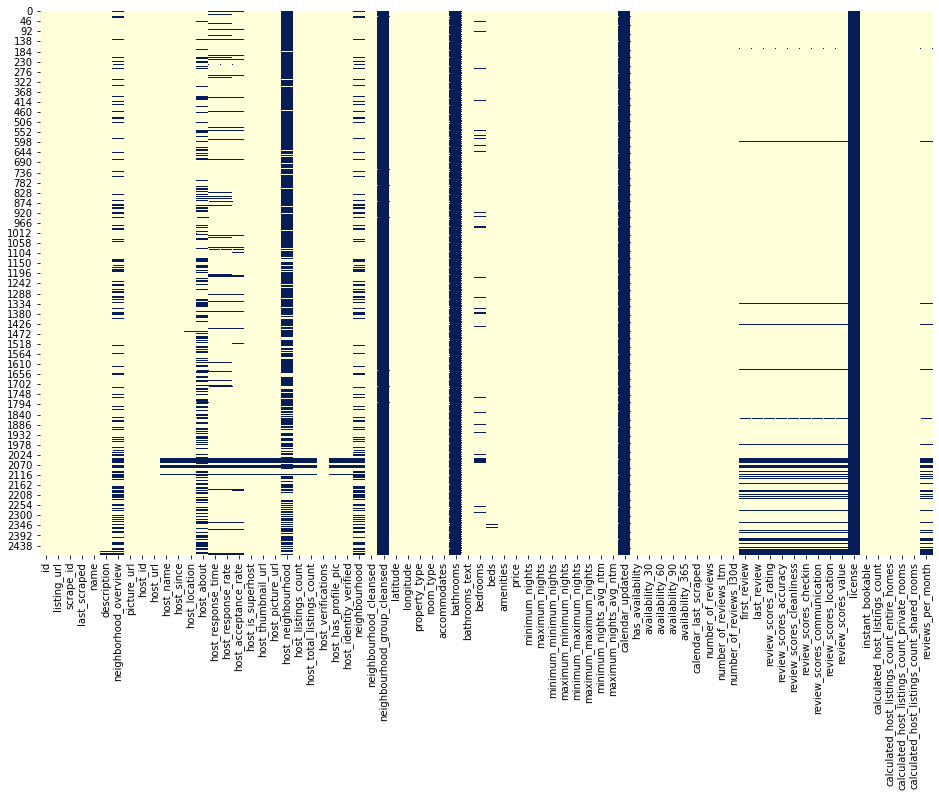

In [34]:
#the blue lines on the heat map represent NaNs in the dataset we also have some empty cells in the dataset that are not represented here 
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [35]:
#the first thing ill do is make a copy of the dataset just in case i mess up. 
df = df_modified = df.copy()
df_modified

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,2.021070e+13,7/10/21,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,...,4.79,4.84,4.48,NaN,f,2,2,0,0,0.75
1,155305,https://www.airbnb.com/rooms/155305,2.021070e+13,7/10/21,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,...,4.76,4.92,4.51,NaN,t,7,1,2,4,5.39
2,156805,https://www.airbnb.com/rooms/156805,2.021070e+13,7/10/21,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,https://www.airbnb.com/users/show/746673,...,4.61,4.84,4.46,NaN,t,7,1,2,4,3.09
3,156926,https://www.airbnb.com/rooms/156926,2.021070e+13,7/10/21,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/98f4e655-c4d6...,746673,https://www.airbnb.com/users/show/746673,...,4.80,4.78,4.79,NaN,t,7,1,2,4,3.47
4,160594,https://www.airbnb.com/rooms/160594,2.021070e+13,7/10/21,Historic Grove Park,Come enjoy the beautiful Grove Park neighborho...,NaN,https://a0.muscache.com/pictures/92433837/d340...,769252,https://www.airbnb.com/users/show/769252,...,4.88,4.90,4.85,NaN,f,1,0,1,0,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,50827270,https://www.airbnb.com/rooms/50827270,2.021070e+13,7/10/21,Stylish Loft in West Asheville,Experience what it's like to live like an Ashe...,The loft is located in the Beacham's Curve sec...,https://a0.muscache.com/pictures/4d4dd1ad-4d0e...,2596554,https://www.airbnb.com/users/show/2596554,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2476,50872089,https://www.airbnb.com/rooms/50872089,2.021070e+13,7/10/21,Clean Cute Asheville Home Away from Home,NaN,NaN,https://a0.muscache.com/pictures/860aa680-b724...,411310266,https://www.airbnb.com/users/show/411310266,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2477,50897156,https://www.airbnb.com/rooms/50897156,2.021070e+13,7/10/21,"Chill Spacious Home for up to 15 - land, games!",Our beautiful home sits on 3 acres of terraced...,There's a mix of both beautiful nature and res...,https://a0.muscache.com/pictures/f6c1ef80-7cbd...,714507,https://www.airbnb.com/users/show/714507,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
2478,50898430,https://www.airbnb.com/rooms/50898430,2.021070e+13,7/10/21,"A Bright, Safe Space- 1 mile from DT, & Biltmore.",Keep it simple at this peaceful and centrally-...,"This neighborhood is one of the safest, people...",https://a0.muscache.com/pictures/b8182cf2-2ec4...,63487017,https://www.airbnb.com/users/show/63487017,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [36]:
#lol...i messed up so i created a second copy
df = df_modified2 = df.copy()

In [37]:
#getting a list of our columns
df_modified.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [38]:
#here we are getting the shape of our dataset
df.shape

(2480, 74)

In [39]:
#to drop the columns that i don't need ill create a list then use the .drop function.
columns_to_drop = ['neighbourhood_group_cleansed','bathrooms','calendar_updated','license','host_neighbourhood']
columns_to_drop

['neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'license',
 'host_neighbourhood']

In [40]:
#here i am droping the columns i don't need
df_modified = df_modified.drop(columns = columns_to_drop)

In [41]:
df_modified2 = df_modified.drop(columns = columns_to_drop)

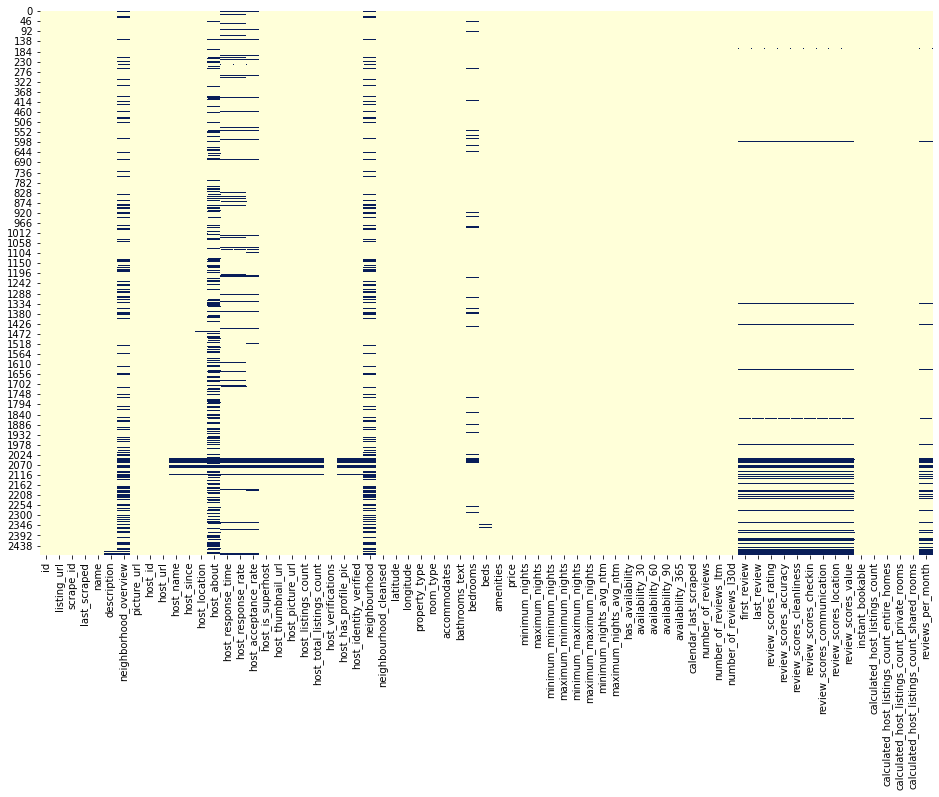

In [42]:
#ill use the head map again to see if it worked
plt.figure(figsize=(16,10))
sns.heatmap(df_modified2.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [43]:
#checking the shape to make sure our changes held....all good 74 to 69 columns
df_modified2

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,2.021070e+13,7/10/21,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,...,4.85,4.79,4.84,4.48,f,2,2,0,0,0.75
1,155305,https://www.airbnb.com/rooms/155305,2.021070e+13,7/10/21,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,...,4.81,4.76,4.92,4.51,t,7,1,2,4,5.39
2,156805,https://www.airbnb.com/rooms/156805,2.021070e+13,7/10/21,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,https://www.airbnb.com/users/show/746673,...,4.76,4.61,4.84,4.46,t,7,1,2,4,3.09
3,156926,https://www.airbnb.com/rooms/156926,2.021070e+13,7/10/21,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/98f4e655-c4d6...,746673,https://www.airbnb.com/users/show/746673,...,4.84,4.80,4.78,4.79,t,7,1,2,4,3.47
4,160594,https://www.airbnb.com/rooms/160594,2.021070e+13,7/10/21,Historic Grove Park,Come enjoy the beautiful Grove Park neighborho...,NaN,https://a0.muscache.com/pictures/92433837/d340...,769252,https://www.airbnb.com/users/show/769252,...,4.94,4.88,4.90,4.85,f,1,0,1,0,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,50827270,https://www.airbnb.com/rooms/50827270,2.021070e+13,7/10/21,Stylish Loft in West Asheville,Experience what it's like to live like an Ashe...,The loft is located in the Beacham's Curve sec...,https://a0.muscache.com/pictures/4d4dd1ad-4d0e...,2596554,https://www.airbnb.com/users/show/2596554,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2476,50872089,https://www.airbnb.com/rooms/50872089,2.021070e+13,7/10/21,Clean Cute Asheville Home Away from Home,NaN,NaN,https://a0.muscache.com/pictures/860aa680-b724...,411310266,https://www.airbnb.com/users/show/411310266,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2477,50897156,https://www.airbnb.com/rooms/50897156,2.021070e+13,7/10/21,"Chill Spacious Home for up to 15 - land, games!",Our beautiful home sits on 3 acres of terraced...,There's a mix of both beautiful nature and res...,https://a0.muscache.com/pictures/f6c1ef80-7cbd...,714507,https://www.airbnb.com/users/show/714507,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
2478,50898430,https://www.airbnb.com/rooms/50898430,2.021070e+13,7/10/21,"A Bright, Safe Space- 1 mile from DT, & Biltmore.",Keep it simple at this peaceful and centrally-...,"This neighborhood is one of the safest, people...",https://a0.muscache.com/pictures/b8182cf2-2ec4...,63487017,https://www.airbnb.com/users/show/63487017,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [47]:
# in order to 
df_modified2.replace(r'^\s+$', np.nan, regex=True, inplace = True)
df_modified2.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2475,50827270,https://www.airbnb.com/rooms/50827270,2.021070e+13,7/10/21,Stylish Loft in West Asheville,Experience what it's like to live like an Ashe...,The loft is located in the Beacham's Curve sec...,https://a0.muscache.com/pictures/4d4dd1ad-4d0e...,2596554,https://www.airbnb.com/users/show/2596554,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2476,50872089,https://www.airbnb.com/rooms/50872089,2.021070e+13,7/10/21,Clean Cute Asheville Home Away from Home,NaN,NaN,https://a0.muscache.com/pictures/860aa680-b724...,411310266,https://www.airbnb.com/users/show/411310266,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2477,50897156,https://www.airbnb.com/rooms/50897156,2.021070e+13,7/10/21,"Chill Spacious Home for up to 15 - land, games!",Our beautiful home sits on 3 acres of terraced...,There's a mix of both beautiful nature and res...,https://a0.muscache.com/pictures/f6c1ef80-7cbd...,714507,https://www.airbnb.com/users/show/714507,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
2478,50898430,https://www.airbnb.com/rooms/50898430,2.021070e+13,7/10/21,"A Bright, Safe Space- 1 mile from DT, & Biltmore.",Keep it simple at this peaceful and centrally-...,"This neighborhood is one of the safest, people...",https://a0.muscache.com/pictures/b8182cf2-2ec4...,63487017,https://www.airbnb.com/users/show/63487017,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2479,50954616,https://www.airbnb.com/rooms/50954616,2.021070e+13,7/10/21,Queen bed bedroom listing of1927 charming bung...,NaN,NaN,https://a0.muscache.com/pictures/ab5202af-8db4...,24226447,https://www.airbnb.com/users/show/24226447,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [48]:
#writing the pandas df to a csv 
df.to_csv('df_modified2')

In [49]:
#now we can deal with the missing data
#df_modified2 = df_modified2.replace(r'^\s*$', np.NaN, regex=True, inplace = True)

In [52]:
df_modified2 = df_modified2.dropna(), inplace = True

SyntaxError: cannot assign to function call (<ipython-input-52-b0d3aad98482>, line 1)

In [51]:
df_modified2

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,2.021070e+13,7/10/21,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,...,4.85,4.79,4.84,4.48,f,2,2,0,0,0.75
1,155305,https://www.airbnb.com/rooms/155305,2.021070e+13,7/10/21,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,...,4.81,4.76,4.92,4.51,t,7,1,2,4,5.39
2,156805,https://www.airbnb.com/rooms/156805,2.021070e+13,7/10/21,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,https://www.airbnb.com/users/show/746673,...,4.76,4.61,4.84,4.46,t,7,1,2,4,3.09
8,295496,https://www.airbnb.com/rooms/295496,2.021070e+13,7/10/21,The Fern Street Apt near Biltmore,"<b>The space</b><br />Welcome to ""Fern Street ...","We love the quiet, tree lined neighborhood wit...",https://a0.muscache.com/pictures/fccae6c5-443a...,1501882,https://www.airbnb.com/users/show/1501882,...,4.97,4.83,4.77,4.73,f,1,1,0,0,0.28
9,304379,https://www.airbnb.com/rooms/304379,2.021070e+13,7/10/21,Refocus Cottage - paradise,"Spring has sprung on the MEADOW, in the WOODS ...",Friendly safe walk-friendly neighborhood. It ...,https://a0.muscache.com/pictures/e55cd9ed-5021...,1566145,https://www.airbnb.com/users/show/1566145,...,5.00,5.00,5.00,4.89,f,2,2,0,0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,50304584,https://www.airbnb.com/rooms/50304584,2.021070e+13,7/10/21,Cozy private room in River Arts District,A clean little room located in the heart of th...,"When you stay with me, you're staying right in...",https://a0.muscache.com/pictures/7fde568c-1ae4...,7741232,https://www.airbnb.com/users/show/7741232,...,5.00,5.00,5.00,5.00,f,1,0,1,0,1.00
2437,50373054,https://www.airbnb.com/rooms/50373054,2.021070e+13,7/10/21,Green Garden Getaway,5-Star Sanitary Deep Clean. Contemporay and st...,We are half-way between Black Mountain and Ash...,https://a0.muscache.com/pictures/35667273-fe7c...,40029182,https://www.airbnb.com/users/show/40029182,...,5.00,5.00,5.00,5.00,f,4,4,0,0,2.00
2441,50401815,https://www.airbnb.com/rooms/50401815,2.021070e+13,7/10/21,Sunny Montford Retreat; Walk to Downtown Ashev...,Enjoy all that Asheville has to offer in a pri...,"Situated on a dead end street, and just a ston...",https://a0.muscache.com/pictures/68d90c5d-ff58...,5451404,https://www.airbnb.com/users/show/5451404,...,5.00,5.00,5.00,5.00,t,1,1,0,0,2.00
2447,50459172,https://www.airbnb.com/rooms/50459172,2.021070e+13,7/10/21,NEW LISTING Spacious West AVL Cottage Dog Frie...,Welcome to Ashevilleshire Cottage. Fantastic W...,The neighborhood is spread out so you'll have ...,https://a0.muscache.com/pictures/miso/Hosting-...,722034,https://www.airbnb.com/users/show/722034,...,5.00,5.00,5.00,5.00,t,11,11,0,0,3.00


In [53]:
df_modified2.to_csv('df_modified2')